# Trabajo Práctico 1
## Análisis Exploratorio

### Richter's Predictor: Modeling Earthquake Damage

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
data_types = {
    'height_percentage':'category',
    'land_surface_condition':'category',
    'foundation_type':'category',
    'roof_type':'category',
    'ground_floor_type':'category',
    'other_floor_type':'category',
    'position':'category',
    'plan_configuration':'category',
    'has_superstructure_adobe_mud':bool,
    'has_superstructure_mud_mortar_stone':bool,
    'has_superstructure_stone_flag':bool,
    'has_superstructure_cement_mortar_stone':bool,
    'has_superstructure_mud_mortar_brick':bool,
    'has_superstructure_cement_mortar_brick':bool,
    'has_superstructure_timber':bool,
    'has_superstructure_bamboo':bool,
    'has_superstructure_rc_non_engineered':bool,
    'has_superstructure_rc_engineered':bool,
    'has_superstructure_other':bool,
    'legal_ownership_status':'category',
    'count_families':'category',
    'has_secondary_use':bool,
    'has_secondary_use_agriculture':bool,
    'has_secondary_use_hotel':bool,
    'has_secondary_use_rental':bool,
    'has_secondary_use_institution':bool,
    'has_secondary_use_school':bool,
    'has_secondary_use_industry':bool,
    'has_secondary_use_health_post':bool,
    'has_secondary_use_gov_office':bool,
    'has_secondary_use_use_police':bool,
    'has_secondary_use_other':bool
    
}

In [3]:
labels = pd.read_csv("train_labels.csv",dtype = {'damage_grade':'category'})
values = pd.read_csv("train_values.csv",dtype = data_types)

In [4]:
labels.head(5)

building_id damage_grade
0       802906            3
1        28830            2
2        94947            3
3       590882            2
4       201944            3

In [5]:
values.tail(5)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage height_percentage  \
260596                    1   55                6                 3   
260597                    2    0                6                 5   
260598                    3   55                6                 7   
260599                    2   10               14                 6   
260600                    3   10                7                 6   

       land_surface_condition foundation_type  ...  \
260596                      n               r  ...   
260597                      t               r  ...   
260598                      t               r  ...   
260599                      t               r  ...   
260600                      n               r  ...   

       has_secondary_use_agriculture has_secondary_use_hotel  \
260596                         False                   False   
260597                         False                   False   
260598                         False                   False   
260599                         False                   False   
260600                         False                   False   

       has_secondary_use_rental has_secondary_use_institution  \
260596                    False                         False   
260597                    False                         False   
260598                    False                         False   
260599                    False                         False   
260600                    False                         False   

       has_secondary_use_school  has_secondary_use_industry  \
260596                    False                       False   
260597                    False                       False   
260598                    False                       False   
260599                    False                       False   
260600                    False                       False   

        has_secondary_use_health_post  has_secondary_use_gov_office  \
260596                          False                         False   
260597                          False                         False   
260598                          False                         False   
260599                          False                         False   
260600                          False                         False   

        has_secondary_use_use_police  has_secondary_use_other  
260596                         False                    False  
260597                         False                    False  
260598                         False                    False  
260599                         False                    False  
260600                         False                    False  

[5 rows x 39 columns]

In [6]:
#damage_grade entre 1 y 3
labels.damage_grade.describe()

count     260601
unique         3
top            2
freq      148259
Name: damage_grade, dtype: object

In [7]:
values.describe()
#promedio de pisos 2, máx cantidad de pisos 9
#edificios viejos, edad 995 años

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count  2.606010e+05   260601.000000   260601.000000   260601.000000   
mean   5.256755e+05       13.900353      701.074685     6257.876148   
std    3.045450e+05        8.033617      412.710734     3646.369645   
min    4.000000e+00        0.000000        0.000000        0.000000   
25%    2.611900e+05        7.000000      350.000000     3073.000000   
50%    5.257570e+05       12.000000      702.000000     6270.000000   
75%    7.897620e+05       21.000000     1050.000000     9412.000000   
max    1.052934e+06       30.000000     1427.000000    12567.000000   

       count_floors_pre_eq            age  area_percentage  
count        260601.000000  260601.000000    260601.000000  
mean              2.129723      26.535029         8.018051  
std               0.727665      73.565937         4.392231  
min               1.000000       0.000000         1.000000  
25%               2.000000      10.000000         5.000000  
50%               2.000000      15.000000         7.000000  
75%               2.000000      30.000000         9.000000  
max               9.000000     995.000000       100.000000

In [8]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   building_id   260601 non-null  int64   
 1   damage_grade  260601 non-null  category
dtypes: category(1), int64(1)
memory usage: 2.2 MB


In [9]:
values.shape
#veo que no hay datos nulos (nans)

(260601, 39)

In [10]:
#veo los tipos de datos y si conviene parsearlos
#había muchos datos binarios como int64
#también datos category que eran objects
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  category
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [11]:
values.land_surface_condition.drop_duplicates()

0    t
1    o
6    n
Name: land_surface_condition, dtype: category
Categories (3, object): ['n', 'o', 't']

In [12]:
values.foundation_type.drop_duplicates()

0     r
7     w
9     i
11    u
34    h
Name: foundation_type, dtype: category
Categories (5, object): ['h', 'i', 'r', 'u', 'w']

In [13]:
values.has_secondary_use_gov_office.drop_duplicates()

0        False
27243     True
Name: has_secondary_use_gov_office, dtype: bool

In [14]:
values.columns.to_list()

['building_id',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_of

In [15]:
values.size

10163439

In [16]:
values.index

RangeIndex(start=0, stop=260601, step=1)

## Cantidad de Pisos por Edificio %

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [18]:
cant_pisos_por_ed = values.loc[:,["count_floors_pre_eq"]]\
.value_counts(normalize=True)

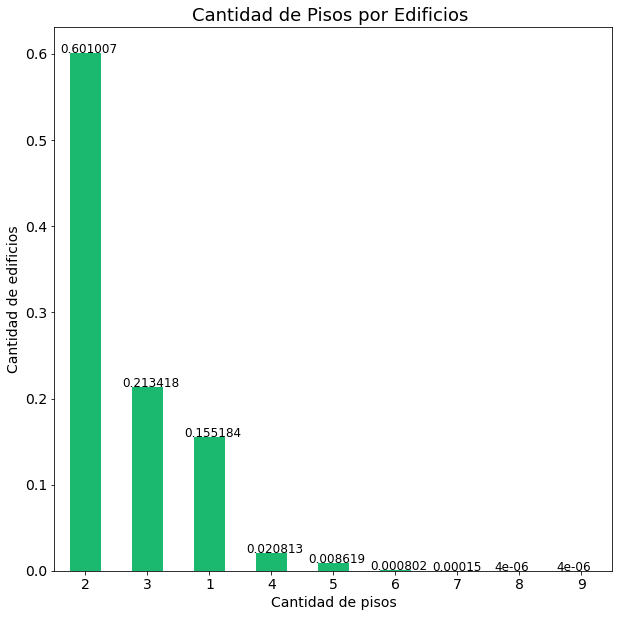

In [19]:
ax = cant_pisos_por_ed.plot.bar(color='#1bb96f',rot=0,figsize=(10,10),fontsize=14)
ax.set_ylabel('Cantidad de edificios',fontsize=14)
ax.set_xlabel('Cantidad de pisos',fontsize=14)
ax.set_title('Cantidad de Pisos por Edificios ',fontsize=18)
#ax.set_facecolor("lightgreen")

bar_labels = cant_pisos_por_ed.values
for index, bar in enumerate(bar_labels):
    ax.text(index-0.4, bar, str(round(bar,6)),fontsize=12)
    
x_labels = values.count_floors_pre_eq.drop_duplicates().values
ax.set_xticklabels(x_labels)
plt.show()

## Tipo de Daño segun Cantidad de Pisos

In [20]:
daño_cant_pisos = values.loc[:,["building_id","count_floors_pre_eq"]]\
.merge(labels,on="building_id",how='inner')\
.loc[:,["damage_grade","count_floors_pre_eq"]]
daño_cant_pisos['aux'] = 1
daño_cant_pisos = daño_cant_pisos.pivot_table(index='count_floors_pre_eq'\
                        ,columns='damage_grade',values='aux',aggfunc='count')


# twilight_r,mako,blues,greens

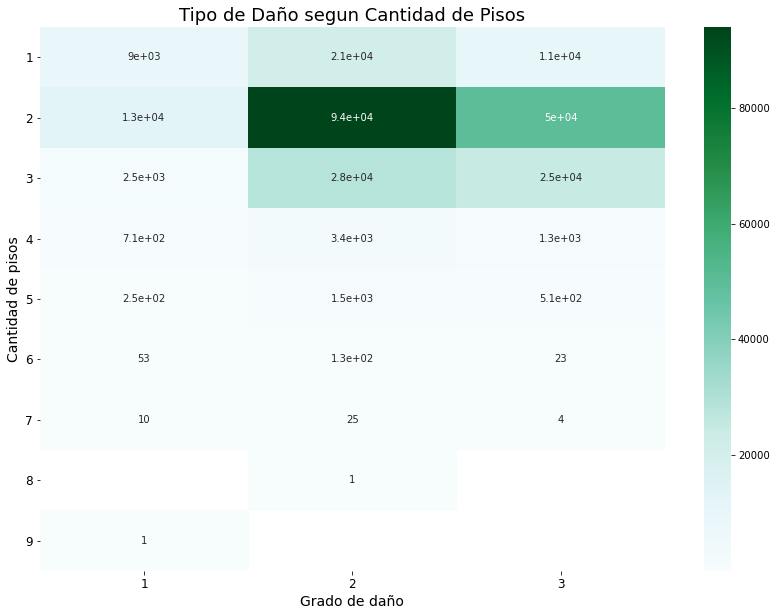

In [21]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(daño_cant_pisos,annot=True,cmap='BuGn')# ,fmt= 'd')
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Cantidad de pisos',fontsize=14)
ax.set_xlabel('Grado de daño',fontsize=14)
ax.set_title('Tipo de Daño segun Cantidad de Pisos',fontsize=18)

y_labels = daño_cant_pisos.index
x_labels = daño_cant_pisos.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)

## Top Usos Construcciones

In [22]:
has_columns = ['has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [86]:
secundarios_suma = values.loc[:,has_columns].sum()
secundarios_suma = secundarios_suma.to_frame().rename(columns={0:"Amount"}) 

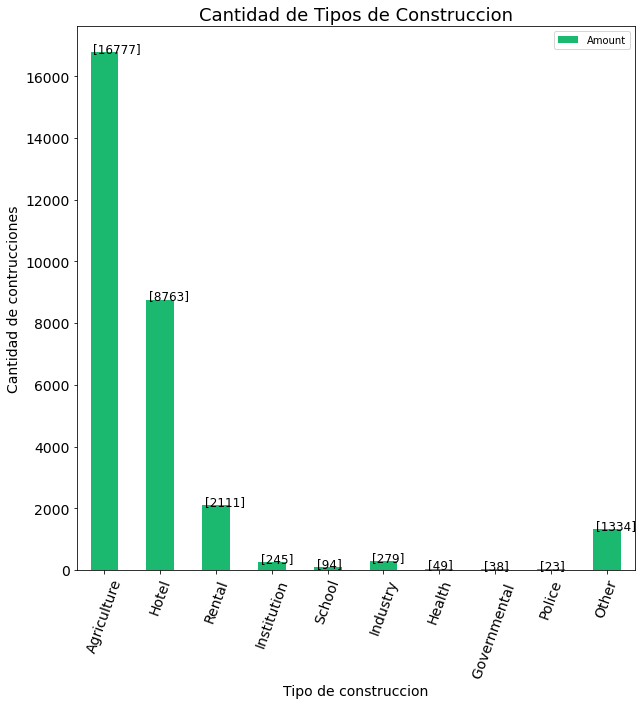

In [87]:
ax = secundarios_suma.plot.bar(color='#1bb96f',rot=70,figsize=(10,10),fontsize=14)
ax.set_ylabel('Cantidad de contrucciones',fontsize=14)
ax.set_xlabel('Tipo de construccion',fontsize=14)
ax.set_title('Cantidad de Tipos de Construccion',fontsize=18)
#ax.set_facecolor("lightgreen")

bar_labels = secundarios_suma.values
for index, bar in enumerate(bar_labels):
    ax.text(index-0.2, bar, str(bar),fontsize=12)
    
x_labels = ['Agriculture',
 'Hotel',
 'Rental',
 'Institution',
 'School',
 'Industry',
 'Health',
 'Governmental ',
 'Police',
 'Other']
ax.set_xticklabels(x_labels)
plt.show()

## 

# Material más afectado por terremotos

## Foundation

In [25]:
foundation_type = values.loc[:,['building_id','foundation_type']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='foundation_type',columns='damage_grade',values='building_id',aggfunc='count')


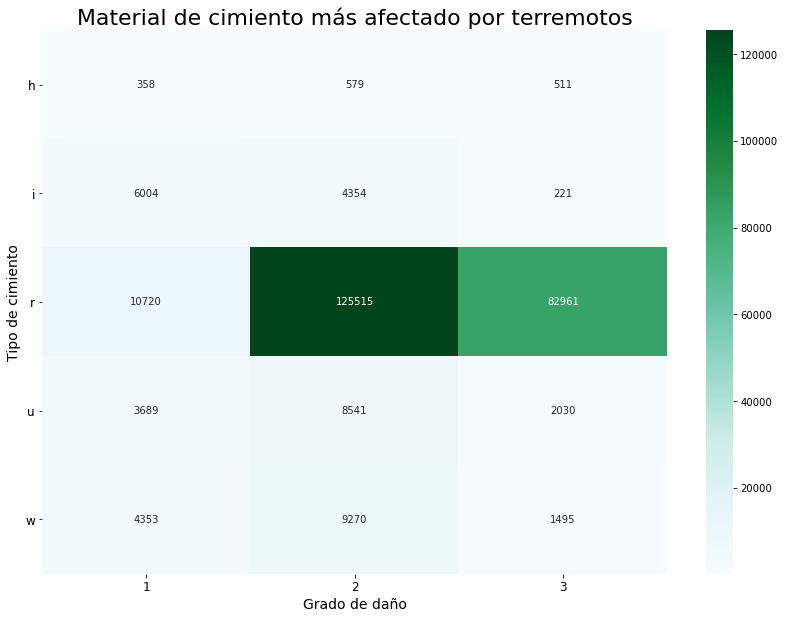

In [26]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(foundation_type,cmap='BuGn',annot=True, fmt='d')
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Tipo de cimiento',fontsize=14)
ax.set_xlabel('Grado de daño',fontsize=14)
ax.set_title('Material de cimiento más afectado por terremotos',fontsize=22)

y_labels = foundation_type.index
x_labels = foundation_type.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)


## Roof

In [27]:
roof_type = values.loc[:,['building_id','roof_type']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='roof_type',columns='damage_grade',values='building_id',aggfunc='count')


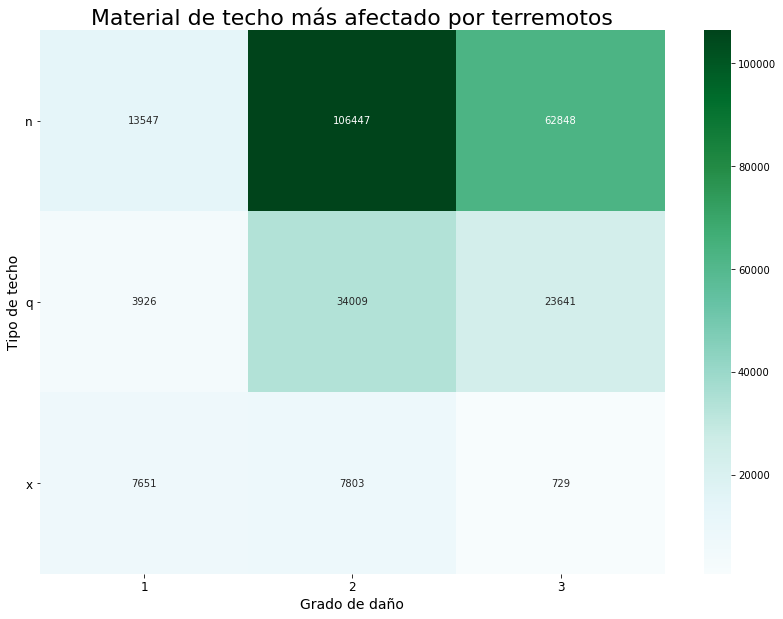

In [28]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(roof_type,cmap='BuGn',annot=True,fmt='d')
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Tipo de techo',fontsize=14)
ax.set_xlabel('Grado de daño',fontsize=14)
ax.set_title('Material de techo más afectado por terremotos',fontsize=22)

y_labels = roof_type.index
x_labels = roof_type.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)


## Ground

In [29]:
ground_type = values.loc[:,['building_id','ground_floor_type']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='ground_floor_type',columns='damage_grade',values='building_id',aggfunc='count')


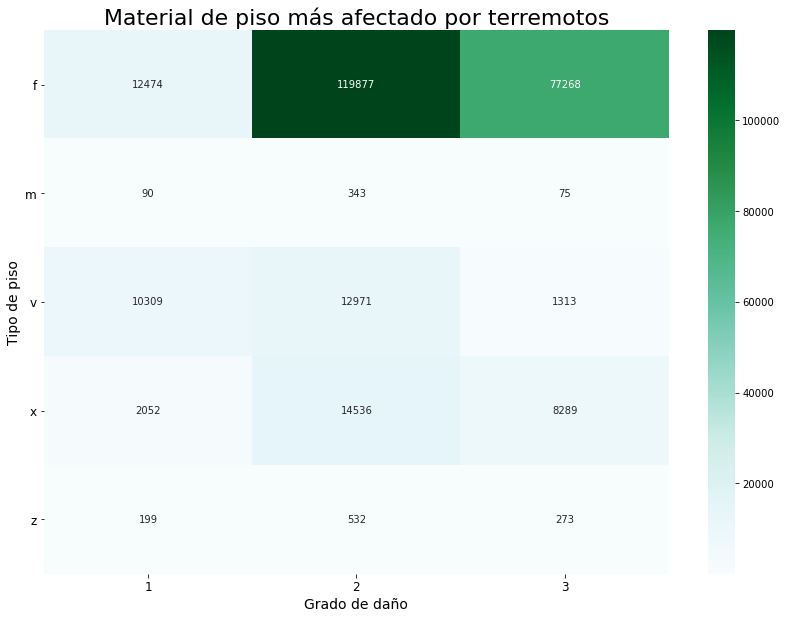

In [30]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(ground_type,cmap='BuGn',annot=True,fmt='d')
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Tipo de piso',fontsize=14)
ax.set_xlabel('Grado de daño',fontsize=14)
ax.set_title('Material de piso más afectado por terremotos',fontsize=22)

y_labels = ground_type.index
x_labels = ground_type.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)


## ScatterPlot Matrix

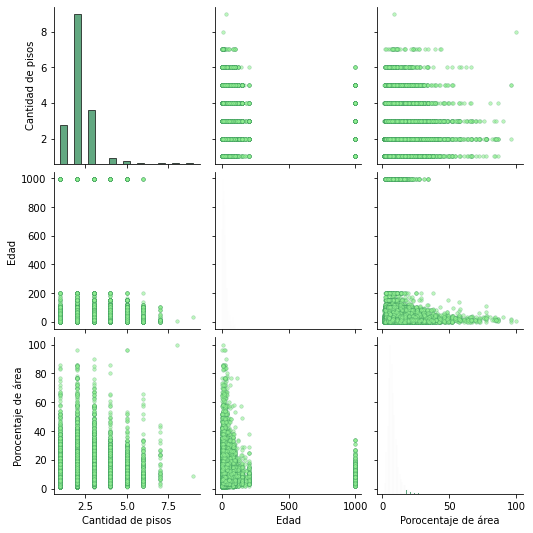

In [31]:
#esto sirve como analisis exploratorio para ver como se relacionan las variables entre si rápidamente
matrix = values.merge(labels,on='building_id',how='inner')\
.loc[:,['building_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage']]\
.rename(columns = {'count_floors_pre_eq' : 'Cantidad de pisos',
 'age' : 'Edad',
 'area_percentage': 'Porocentaje de área'})\
.set_index('building_id')

p = sns.pairplot(matrix, 
                diag_kws= {'color' : 'seagreen'},
                plot_kws = {'alpha': 0.6, 's': 13, 'edgecolor': 'seagreen', 'color': 'lightgreen'}) 


## Antigüedad según material

### Foundation

In [32]:
foundation_type = values.loc[:,['age','foundation_type']]
foundation_type

age foundation_type
0        30               r
1        10               r
2        10               r
3        10               r
4        30               r
...     ...             ...
260596   55               r
260597    0               r
260598   55               r
260599   10               r
260600   10               r

[260601 rows x 2 columns]

Text(0.5, 1.0, 'Antigüedad segun tipo de cimiento')

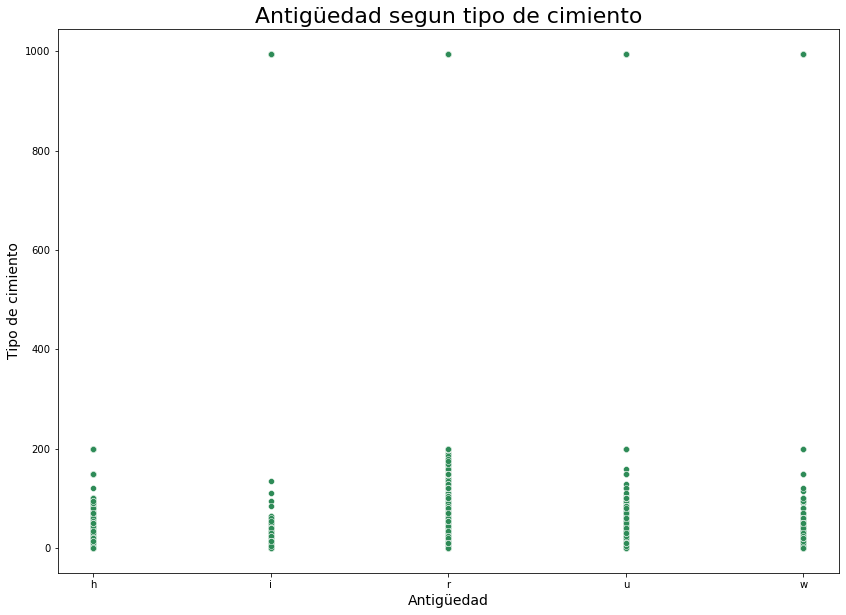

In [33]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=foundation_type, x=foundation_type.foundation_type, y=foundation_type.age,color='seagreen')
ax.set_ylabel('Tipo de cimiento',fontsize=14)
ax.set_xlabel('Antigüedad',fontsize=14)
ax.set_title('Antigüedad segun tipo de cimiento',fontsize=22)

### Roof

In [34]:
roof_type = values.loc[:,['age','roof_type']]
roof_type

age roof_type
0        30         n
1        10         n
2        10         n
3        10         n
4        30         n
...     ...       ...
260596   55         n
260597    0         n
260598   55         q
260599   10         x
260600   10         n

[260601 rows x 2 columns]

Text(0.5, 1.0, 'Antigüedad segun tipo de techo')

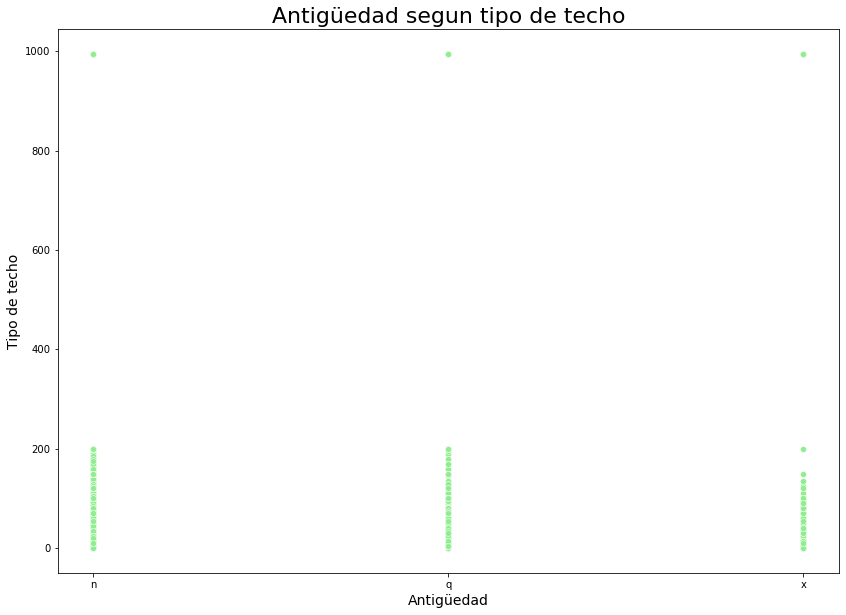

In [35]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=roof_type, x=roof_type.roof_type, y=roof_type.age,color='lightgreen')
ax.set_ylabel('Tipo de techo',fontsize=14)
ax.set_xlabel('Antigüedad',fontsize=14)
ax.set_title('Antigüedad segun tipo de techo',fontsize=22)

### Ground

In [36]:
ground_type = values.loc[:,['age','ground_floor_type']]
ground_type

age ground_floor_type
0        30                 f
1        10                 x
2        10                 f
3        10                 f
4        30                 f
...     ...               ...
260596   55                 f
260597    0                 f
260598   55                 f
260599   10                 v
260600   10                 f

[260601 rows x 2 columns]

Text(0.5, 1.0, 'Antigüedad segun tipo de suelo')

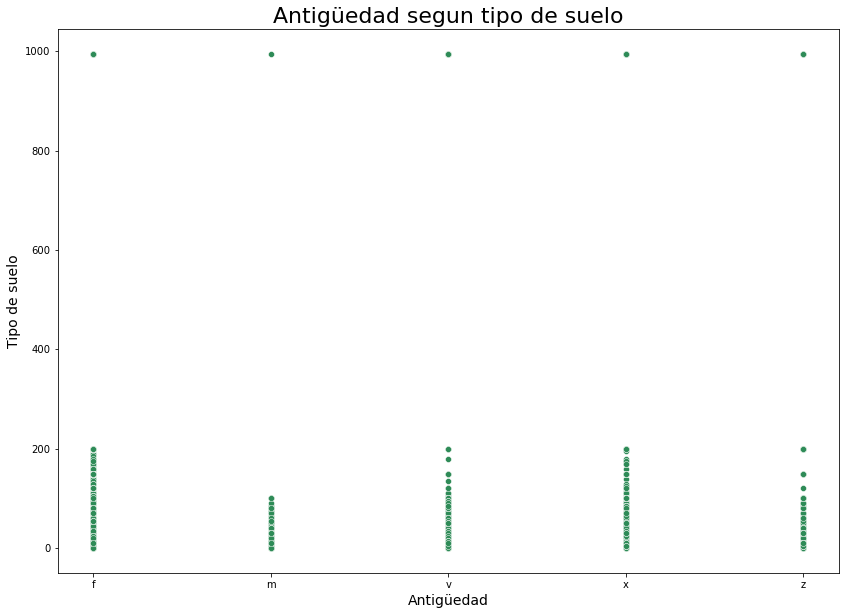

In [37]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=ground_type, x=ground_type.ground_floor_type, y=ground_type.age,color='seagreen')
ax.set_ylabel('Tipo de suelo',fontsize=14)
ax.set_xlabel('Antigüedad',fontsize=14)
ax.set_title('Antigüedad segun tipo de suelo',fontsize=22)

## Cantidad de daño según antigüedad

In [38]:
age_damage = values.loc[:,['building_id','age']].merge(labels,on='building_id',how='inner')
age_damage = age_damage.loc[:,['damage_grade','age']]
age_damage

damage_grade  age
0                 3   30
1                 2   10
2                 3   10
3                 2   10
4                 3   30
...             ...  ...
260596            2   55
260597            3    0
260598            3   55
260599            2   10
260600            3   10

[260601 rows x 2 columns]

Text(0.5, 1.0, 'Tipo de daño segun Antigüedad')

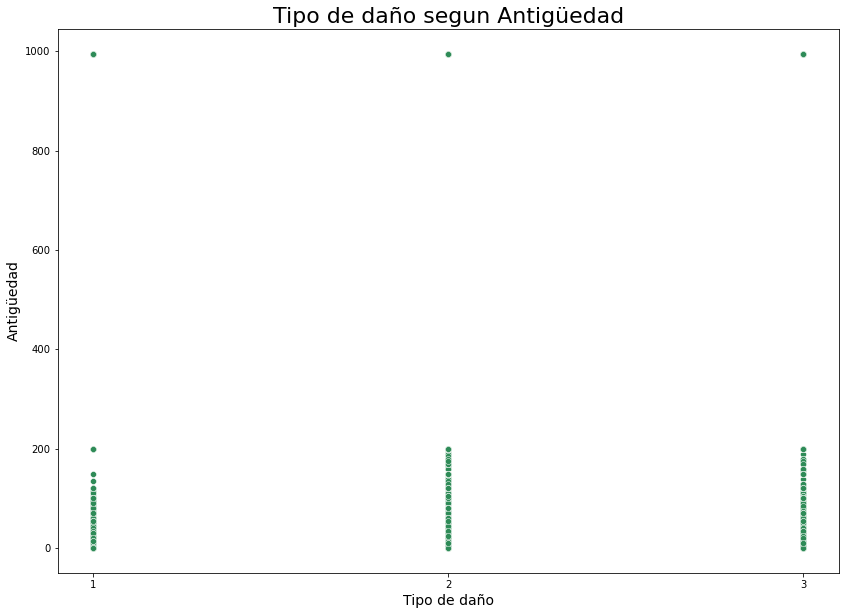

In [39]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=age_damage, x=age_damage.damage_grade, y=age_damage.age,color="seagreen")
ax.set_ylabel('Antigüedad',fontsize=14)
ax.set_xlabel('Tipo de daño',fontsize=14)
ax.set_title('Tipo de daño segun Antigüedad',fontsize=22)

## Cantidad de daño según orientación

In [40]:
#notablemente la orinetacion 'o' recibió menos daños y la orientacion 's' muchisimos
orientation_damage = values.loc[:,['building_id','position']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='damage_grade',columns='position',values='building_id',aggfunc='count')
orientation_damage

position         j     o       s      t
damage_grade                           
1             1675   120   19867   3462
2             7899  1609  116051  22700
3             3708   604   66172  16734

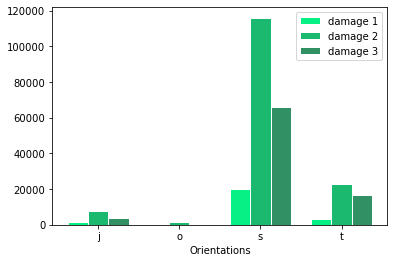

In [41]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = orientation_damage.iloc[0]
bars2 = orientation_damage.iloc[1]
bars3 = orientation_damage.iloc[2]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, color='#06f085', width=barWidth, edgecolor='white', label='damage 1')
plt.bar(r2, bars2, color='#1bb96f', width=barWidth, edgecolor='white', label='damage 2')
plt.bar(r3, bars3, color='#319165', width=barWidth, edgecolor='white', label='damage 3')

# Add xticks on the middle of the group bars
plt.xlabel('Orientations')
plt.xticks([r + barWidth for r in range(len(bars1))], ['j', 'o', 's', 't'])
 
# Create legend & Show graphic
plt.legend()

plt.show()

## Cantidad de edificios totales, y cuantos de esos eran sísmicos o no


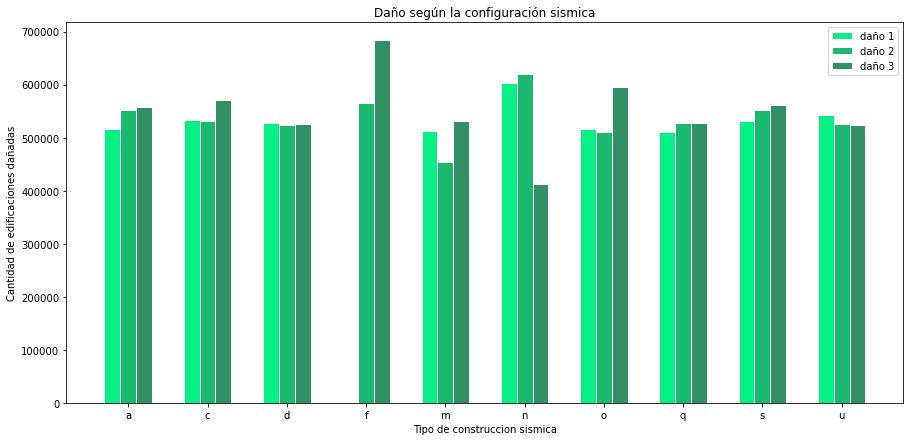

In [44]:
# set width of bars
barWidth = 0.2
barHeight = 20
 
# set heights of bars
bars1 = plan_configuration_damage.iloc[0]
bars2 = plan_configuration_damage.iloc[1]
bars3 = plan_configuration_damage.iloc[2]
 

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
fig, ax = plt.subplots(figsize = (15, 7))
# Make the plot
plt.bar(r1, bars1, color='#06f085', width=barWidth, edgecolor='white', label='daño 1')
plt.bar(r2, bars2, color='#1bb96f', width=barWidth, edgecolor='white', label='daño 2')
plt.bar(r3, bars3, color='#319165', width=barWidth, edgecolor='white', label='daño 3')

# Add xticks on the middle of the group bars
plt.xlabel('Tipo de construccion sismica')
plt.ylabel('Cantidad de edificaciones dañadas')
plt.title('Daño según la configuración sismica')
plt.xticks([r + barWidth for r in range(len(bars1))], ['a', 'c', 'd', 'f', 'm', 'n', 'o', 'q', 's', 'u'],
           size = 10)

plt.legend()

plt.show()

## Area ocupada - nivel de destrucción
area_percentage(tipo: entero): superficie normalizada ocupada por la edifica-ción

# Daño segun el area ocupada

In [47]:
ground_area2 = values.loc[:,['building_id','area_percentage']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='area_percentage',columns='damage_grade',values='building_id',aggfunc='count')\

for i in range (len(ground_area2)):
     ground_area2.iloc[i] =\
     (ground_area2.iloc[i]/(ground_area2.iloc[i].sum()))

ground_area2 = ground_area2.T

ground_area2

area_percentage   1     2     3     4     5     6     7     8     9     10   \
damage_grade                                                                  
1               0.133 0.128 0.099 0.092 0.073 0.076 0.069 0.073 0.079 0.095   
2               0.544 0.529 0.522 0.556 0.547 0.551 0.584 0.592 0.608 0.601   
3               0.322 0.343 0.379 0.353 0.380 0.374 0.347 0.335 0.313 0.305   

area_percentage  ...   78    80    82    83    84    85    86    90    96   \
damage_grade     ...                                                         
1                ...   nan   nan   nan   nan 0.333   nan 0.600   nan 0.333   
2                ...   nan 1.000 1.000 0.333   nan 0.750 0.400 1.000 0.333   
3                ... 1.000   nan   nan 0.667 0.667 0.250   nan   nan 0.333   

area_percentage   100  
damage_grade           
1                 nan  
2               1.000  
3                 nan  

[3 rows x 84 columns]

In [48]:
import plotly.graph_objects as go
import plotly.express as px

ground_area = values.loc[:,['building_id','area_percentage','age', 'count_floors_pre_eq']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='area_percentage',columns='damage_grade',values='building_id',aggfunc='count')
#ground_area = ground_area.loc[:,['area_percentage','age', 'count_floors_pre_eq', 'damage_grade']]
ground_area

damage_grade           1         2         3
area_percentage                             
1                 12.000    49.000    29.000
2                408.000  1683.000  1090.000
3               1169.000  6183.000  4485.000
4               1762.000 10686.000  6788.000
5               2402.000 17890.000 12432.000
...                  ...       ...       ...
85                   nan     3.000     1.000
86                 3.000     2.000       nan
90                   nan     1.000       nan
96                 1.000     1.000     1.000
100                  nan     1.000       nan

[84 rows x 3 columns]

## Edificaciones según su edad y su área  

In [49]:
import plotly.express as px
fig = px.scatter(values.loc[:,['age', 'area_percentage']]\
                 .rename(columns= {'age': 'Edad', 'area_percentage':'Area ocupada'}),
                 x= 'Edad', y = 'Area ocupada',
                color_discrete_sequence=['seagreen'],
                title = "Edad de las edificaciones según su área ocupada")
fig.show()

# Principales edificaciones materiales

In [50]:
uso_principal = values.loc[values['has_secondary_use'] == False]
uso_principal

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage height_percentage  \
0                         2   30                6                 5   
1                         2   10                8                 7   
2                         2   10                5                 5   
3                         2   10                6                 5   
4                         3   30                8                 9   
...                     ...  ...              ...               ...   
260596                    1   55                6                 3   
260597                    2    0                6                 5   
260598                    3   55                6                 7   
260599                    2   10               14                 6   
260600                    3   10                7                 6   

       land_surface_condition foundation_type  ...  \
0                           t               r  ...   
1                           o               r  ...   
2                           t               r  ...   
3                           t               r  ...   
4                           t               r  ...   
...                       ...             ...  ...   
260596                      n               r  ...   
260597                      t               r  ...   
260598                      t               r  ...   
260599                      t               r  ...   
260600                      n               r  ...   

       has_secondary_use_agriculture has_secondary_use_hotel  \
0                              False                   False   
1                              False                   False   
2                              False                   False   
3                              False                   False   
4                              False                   False   
...                              ...                     ...   
260596                         False                   False   
260597                         False                   False   
260598                         False                   False   
260599                         False                   False   
260600                         False                   False   

       has_secondary_use_rental has_secondary_use_institution  \
0                         False                         False   
1                         False                         False   
2                         False                         False   
3                         False                         False   
4                         False                         False   
...                         ...                           ...   
260596                    False                         False   
260597                    False                         False   
260598                    False                         False   
260599                    False                         False   
260600                    False                         False   

       has_secondary_use_school  has_secondary_use_industry  \
0                         False         

In [81]:
uso_principal_material = uso_principal.loc[:,['land_surface_condition',
                        'foundation_type','roof_type', 'ground_floor_type','other_floor_type',
                        'position','plan_configuration']]
uso_principal_material

land_surface_condition foundation_type roof_type ground_floor_type  \
0                           t               r         n                 f   
1                           o               r         n                 x   
2                           t               r         n                 f   
3                           t               r         n                 f   
4                           t               r         n                 f   
...                       ...             ...       ...               ...   
260596                      n               r         n                 f   
260597                      t               r         n                 f   
260598                      t               r         q                 f   
260599                      t               r         x                 v   
260600                      n               r         n                 f   

       other_floor_type position plan_configuration  
0                     q        t                  d  
1                     q        s                  d  
2                     x        t                  d  
3                     x        s                  d  
4                     x        s                  d  
...                 ...      ...                ...  
260596                j        s                  q  
260597                q        s                  d  
260598                q        s                  d  
260599                s        j                  d  
260600                q        j                  d  

[231445 rows x 7 columns]

# Principales por condicion de superficie

In [82]:
principal_cond_sup = uso_principal.groupby('land_surface_condition').agg({'building_id':'count'})
principal_cond_sup = principal_cond_sup.reset_index()
principal_cond_sup

land_surface_condition  building_id
0                      n        31717
1                      o         7272
2                      t       192456

In [83]:
fig = px.pie(principal_cond_sup, values='building_id', names = 'land_surface_condition',
                                 color_discrete_sequence=px.colors.sequential.Blugrn,
                                 title = 'Edificaciones principales según su condición de superficie')
fig.show()

# Principales según sus cimientos

In [54]:
principal_cimientos = uso_principal.groupby('foundation_type').agg({'building_id':'count'})
principal_cimientos = principal_cimientos.reset_index()
principal_cimientos

foundation_type  building_id
0               h         1267
1               i         6688
2               r       197879
3               u        11994
4               w        13617

In [55]:
fig = px.pie(principal_cimientos, values='building_id', names = 'foundation_type',
                                 color_discrete_sequence=px.colors.sequential.Blugrn,
                                 title = 'Edificaciones principales según sus cimientos')
fig.show()

# Principales según material del techo 

In [56]:
principal_techo = uso_principal.groupby('roof_type').agg({'building_id':'count'})
principal_techo = principal_techo.reset_index()
principal_techo

roof_type  building_id
0         n       163503
1         q        56672
2         x        11270

In [57]:
fig = px.pie(principal_techo, values='building_id', names = 'roof_type',
                                 color_discrete_sequence=px.colors.sequential.Blugrn,
                                 title = 'Edificaciones principales según el material del techo')
fig.show()

# Principales según tipo de construcción usada en plata baja

In [58]:
principal_planta_baja = uso_principal.groupby('ground_floor_type').agg({'building_id':'count'})
principal_planta_baja = principal_planta_baja.reset_index()
principal_planta_baja

ground_floor_type  building_id
0                 f       189871
1                 m          401
2                 v        18222
3                 x        22197
4                 z          754

In [59]:
fig = px.pie(principal_planta_baja, values='building_id', names = 'ground_floor_type',
                                 color_discrete_sequence=px.colors.sequential.Blugrn,
                                 title = 'Edificaciones principales según tipo de construcción usada en planta baja')
fig.show()

# Principales según tipo de construcción usada en los pisos superiores

In [60]:
principal_pisos_sup = uso_principal.groupby('other_floor_type').agg({'building_id':'count'})
principal_pisos_sup = principal_pisos_sup.reset_index()
principal_pisos_sup

other_floor_type  building_id
0                j        35849
1                q       148859
2                s         7549
3                x        39188

In [61]:
fig = px.pie(principal_pisos_sup, values='building_id', names = 'other_floor_type',
                                 color_discrete_sequence=px.colors.sequential.Blugrn,
                                 title = 'Edificaciones principales según el tipo de material usado en los pisos superiores ')
fig.show()

# Principales según su orientación

In [62]:
principal_orientacion = uso_principal.groupby('position').agg({'building_id':'count'})
principal_orientacion = principal_orientacion.reset_index()
principal_orientacion

position  building_id
0        j         9982
1        o         2037
2        s       182889
3        t        36537

In [63]:
fig = px.pie(principal_orientacion, values='building_id', names = 'position',
                                 color_discrete_sequence=px.colors.sequential.Blugrn,
                                 title = 'Edificaciones principales según su orientación')
fig.show()

# Principales según su plan de configuración sismica

In [64]:
principal_config = uso_principal.groupby('plan_configuration').agg({'building_id':'count'})
principal_config = principal_config.reset_index()
principal_config

plan_configuration  building_id
0                  a          208
1                  c          221
2                  d       222352
3                  f           20
4                  m           32
5                  n           34
6                  o          129
7                  q         5064
8                  s          296
9                  u         3089

In [65]:
fig = px.pie(principal_config, values='building_id', names = 'plan_configuration',
                                 color_discrete_sequence=px.colors.sequential.Blugrn,
                                 title = 'Edificaciones principales según su configuración sismica')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

## Categorias

In [66]:
values_cat = values.rename(columns = {'has_secondary_use_agriculture' :'agricultura', 'has_secondary_use_hotel':'hotel',
       'has_secondary_use_rental': 'renta', 'has_secondary_use_institution':'institucion',
       'has_secondary_use_school':'colegio', 'has_secondary_use_industry':'industria',
       'has_secondary_use_health_post':'puesto de salud', 'has_secondary_use_gov_office':'oficina gubernamental',
       'has_secondary_use_use_police':'policia', 'has_secondary_use_other':'otros'})

values

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage height_percentage  \
0                         2   30                6                 5   
1                         2   10                8                 7   
2                         2   10                5                 5   
3                         2   10                6                 5   
4                         3   30                8                 9   
...                     ...  ...              ...               ...   
260596                    1   55                6                 3   
260597                    2    0                6                 5   
260598                    3   55                6                 7   
260599                    2   10               14                 6   
260600                    3   10                7                 6   

       land_surface_condition foundation_type  ...  \
0                           t               r  ...   
1                           o               r  ...   
2                           t               r  ...   
3                           t               r  ...   
4                           t               r  ...   
...                       ...             ...  ...   
260596                      n               r  ...   
260597                      t               r  ...   
260598                      t               r  ...   
260599                      t               r  ...   
260600                      n               r  ...   

       has_secondary_use_agriculture has_secondary_use_hotel  \
0                              False                   False   
1                              False                   False   
2                              False                   False   
3                              False                   False   
4                              False                   False   
...                              ...                     ...   
260596                         False                   False   
260597                         False                   False   
260598                         False                   False   
260599                         False                   False   
260600                         False                   False   

       has_secondary_use_rental has_secondary_use_institution  \
0                         False                         False   
1                         False                         False   
2                         False                         False   
3                         False                         False   
4                         False                         False   
...                         ...                           ...   
260596                    False                         False   
260597                    False                         False   
260598                    False                         False   
260599                    False                         False   
260600                    False                         False   

       has_secondary_use_school  has_secondary_use_industry  \
0                         False         

In [67]:
categ_respecto_plan = values_cat.loc[:,['plan_configuration', 'agricultura', 'hotel', 'renta', 'institucion',
                                'colegio', 'industria','puesto de salud', 'oficina gubernamental','policia', 'otros']]
categ_respecto_plan = categ_respecto_plan.groupby("plan_configuration").sum()
categ_respecto_plan = categ_respecto_plan.T

for i in range (len(categ_respecto_plan)):
     categ_respecto_plan.iloc[i] =\
     (categ_respecto_plan.iloc[i]/(categ_respecto_plan.iloc[i].sum()))

categ_respecto_plan = categ_respecto_plan.T

categ_respecto_plan

agricultura  hotel  renta  institucion  colegio  \
plan_configuration                                                    
a                         0.001  0.003  0.005        0.000    0.000   
c                         0.001  0.008  0.006        0.012    0.043   
d                         0.973  0.923  0.910        0.894    0.830   
f                         0.000  0.000  0.000        0.000    0.000   
m                         0.000  0.001  0.000        0.000    0.011   
n                         0.000  0.000  0.000        0.000    0.000   
o                         0.000  0.002  0.001        0.000    0.021   
q                         0.014  0.031  0.033        0.049    0.032   
s                         0.001  0.003  0.002        0.004    0.000   
u                         0.010  0.029  0.042        0.041    0.064   

                    industria  puesto de salud  oficina gubernamental  \
plan_configuration                                                      
a                       0.000            0.000                  0.000   
c                       0.007            0.000                  0.000   
d                       0.928            0.898                  0.974   
f                       0.000            0.000                  0.000   
m                       0.000            0.000                  0.000   
n                       0.000            0.000                  0.000   
o                       0.000            0.000                  0.000   
q                       0.032            0.082                  0.026   
s                       0.004            0.000                  0.000   
u                       0.029            0.020                  0.000   

                    policia  otros  
plan_configuration                  
a                     0.000  0.001  
c                     0.000  0.001  
d                     0.826  0.965  
f                     0.000  0.000  
m                     0.000  0.000  
n                     0.000  0.000  
o                     0.000  0.001  
q                     0.130  0.015  
s                     0.043  0.001  
u                     0.000  0.016

In [68]:
import plotly.graph_objects as go

categories = categ_respecto_plan.columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=categ_respecto_plan.iloc[0].to_list(),
      theta=categories,
      fill='toself',
      name='a'
))
fig.add_trace(go.Scatterpolar(
      r=categ_respecto_plan.iloc[1].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'lightgreen'),
      name='c'
))
fig.add_trace(go.Scatterpolar(
      r=categ_respecto_plan.iloc[2].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'darkgreen'),
      name='d'
))
fig.add_trace(go.Scatterpolar(
      r=categ_respecto_plan.iloc[3].to_list(),
      theta=categories,
      fill='toself',
      name='f'
))
fig.add_trace(go.Scatterpolar(
      r=categ_respecto_plan.iloc[4].to_list(),
      theta=categories,
      fill='toself',
      name='m'
))
fig.add_trace(go.Scatterpolar(
      r=categ_respecto_plan.iloc[5].to_list(),
      theta=categories,
      fill='toself',
      name='n'
))
fig.add_trace(go.Scatterpolar(
      r=categ_respecto_plan.iloc[6].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'green'),
      name='o'
))
fig.add_trace(go.Scatterpolar(
      r=categ_respecto_plan.iloc[7].to_list(),
      theta=categories,
      fill='toself',
      name='q'
))
fig.add_trace(go.Scatterpolar(
      r=categ_respecto_plan.iloc[8].to_list(),
      theta=categories,
      fill='toself',
      name='s'
))
fig.add_trace(go.Scatterpolar(
      r=categ_respecto_plan.iloc[8].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#00FF00'),
      name='u'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1],
    )),
  showlegend=True,
   title = 'Sectores según el tipo de formato de configuración sismica'
)

fig.show()


##########puedo rescatar que la mayoria de las edificaciones de los distintos sectores
##########sociales tienen una estructura de tipo d sismica

##### del tipo f y n no hay ninguna

### u y s muy parecidos 

# Edificaciones por orientacion

In [69]:
categ_por_orientacion = values_cat.loc[:,['position', 'agricultura', 'hotel', 'renta', 'institucion',
                                'colegio', 'industria','puesto de salud', 'oficina gubernamental','policia', 'otros']]

categ_por_orientacion = categ_por_orientacion.groupby("position").sum()
categ_por_orientacion = categ_por_orientacion.T

for i in range (len(categ_por_orientacion)):
    categ_por_orientacion.iloc[i] =\
    (categ_por_orientacion.iloc[i]/(categ_por_orientacion.iloc[i].sum()))
    
categ_por_orientacion = categ_por_orientacion.T

categ_por_orientacion

agricultura  hotel  renta  institucion  colegio  industria  \
position                                                               
j               0.030  0.265  0.164        0.151    0.128      0.097   
o               0.001  0.023  0.025        0.000    0.000      0.036   
s               0.788  0.434  0.529        0.624    0.649      0.667   
t               0.181  0.278  0.282        0.224    0.223      0.201   

          puesto de salud  oficina gubernamental  policia  otros  
position                                                          
j                   0.204                  0.105    0.087  0.058  
o                   0.020                  0.000    0.000  0.009  
s                   0.531                  0.500    0.783  0.726  
t                   0.245                  0.395    0.130  0.206

In [70]:
import plotly.graph_objects as go

categories = categ_por_orientacion.columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r= categ_por_orientacion.iloc[0].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#00FF00'),
      name='j'
))
fig.add_trace(go.Scatterpolar(
      r= categ_por_orientacion.iloc[1].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'lightblue'),
      name='o'
))
fig.add_trace(go.Scatterpolar(
      r=categ_por_orientacion.iloc[2].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'darkgreen'),
      name='s'
))
fig.add_trace(go.Scatterpolar(
      r=categ_por_orientacion.iloc[3].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'lightgreen'),
      name='t'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.9],
    )),
  showlegend=True,
title = 'Sectores según su orientación'
)

fig.show()



####La mayoria se orienta hacia s

# Sectores segun la condición de la superficie

In [71]:
cant_pisos_por_condicion = values_cat.loc[:,['land_surface_condition', 'agricultura', 'hotel', 'renta', 'institucion',
                                'colegio', 'industria','puesto de salud', 'oficina gubernamental','policia', 'otros']]

cant_pisos_por_condicion = cant_pisos_por_condicion.groupby("land_surface_condition").sum()
cant_pisos_por_condicion= cant_pisos_por_condicion.T

for i in range (len(cant_pisos_por_condicion)):
    cant_pisos_por_condicion.iloc[i] =\
    (cant_pisos_por_condicion.iloc[i]/(cant_pisos_por_condicion.iloc[i].sum()))
cant_pisos_por_condicion = cant_pisos_por_condicion.T

cant_pisos_por_condicion

agricultura  hotel  renta  institucion  colegio  \
land_surface_condition                                                    
n                             0.143  0.114  0.103        0.086    0.064   
o                             0.034  0.039  0.030        0.045    0.011   
t                             0.822  0.847  0.866        0.869    0.926   

                        industria  puesto de salud  oficina gubernamental  \
land_surface_condition                                                      
n                           0.111            0.102                  0.132   
o                           0.029            0.041                  0.000   
t                           0.860            0.857                  0.868   

                        policia  otros  
land_surface_condition                  
n                         0.043  0.176  
o                         0.000  0.067  
t                         0.957  0.756

In [72]:

categories = cant_pisos_por_condicion.columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=cant_pisos_por_condicion.iloc[0].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#06f085'),
      name='n'
))
fig.add_trace(go.Scatterpolar(
      r=cant_pisos_por_condicion.iloc[1].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'green'),
      name='o'
))
fig.add_trace(go.Scatterpolar(
      r=cant_pisos_por_condicion.iloc[2].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'seagreen'),    
      name='t'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1],
    )),
  showlegend=True,
title = 'Sectores según la condición de la superficie terrestre'
)

fig.show()

###la mayoria tiene una condicion terrestre t, muy poca chance de que tengan de las otras


# Sectores según los cimientos de la edificación

In [73]:
cant_pisos_por_cimiento = values_cat.loc[:,['foundation_type', 'agricultura', 'hotel', 'renta', 'institucion',
                                'colegio', 'industria','puesto de salud', 'oficina gubernamental','policia', 'otros']]


cant_pisos_por_cimiento = cant_pisos_por_cimiento.groupby("foundation_type").sum()
cant_pisos_por_cimiento = cant_pisos_por_cimiento.T

for i in range (len(cant_pisos_por_cimiento)):
    cant_pisos_por_cimiento.iloc[i] =\
    (cant_pisos_por_cimiento.iloc[i]/(cant_pisos_por_cimiento.iloc[i].sum()))
# categ_respecto_pisos = categ_respecto_pisos.reset_index()
cant_pisos_por_cimiento = cant_pisos_por_cimiento.T

cant_pisos_por_cimiento

agricultura  hotel  renta  institucion  colegio  industria  \
foundation_type                                                               
h                      0.006  0.007  0.003        0.012    0.000      0.007   
i                      0.008  0.296  0.426        0.461    0.404      0.115   
r                      0.894  0.520  0.366        0.343    0.319      0.627   
u                      0.028  0.141  0.175        0.163    0.223      0.176   
w                      0.063  0.036  0.030        0.020    0.053      0.075   

                 puesto de salud  oficina gubernamental  policia  otros  
foundation_type                                                          
h                          0.000                  0.000    0.000  0.003  
i                          0.286                  0.474    0.217  0.066  
r                          0.531                  0.447    0.652  0.827  
u                          0.184                  0.053    0.130  0.079  
w                          0.000                  0.026    0.000  0.025

In [74]:
categories = cant_pisos_por_cimiento.columns[1:]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=cant_pisos_por_cimiento.iloc[0].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#7AE2B9'),
      name='h'
))
fig.add_trace(go.Scatterpolar(
      r=cant_pisos_por_cimiento.iloc[1].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#5DFF53'),
      name='i'
))
fig.add_trace(go.Scatterpolar(
      r=cant_pisos_por_cimiento.iloc[2].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'green'),
      name='r'
))
fig.add_trace(go.Scatterpolar(
      r=cant_pisos_por_cimiento.iloc[3].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#669A86'),
      name='u'
))
fig.add_trace(go.Scatterpolar(
      r=cant_pisos_por_cimiento.iloc[4].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'yellowgreen'),
      name='w'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.9],
    )),
  showlegend=True,
title = 'Sectores según sus cimientos'
)

fig.show()


####En instituciones, colegios e industrias predominan los cimientos de tipo i
####En las rentas, hoteles, puestos de salud, oficinas gubernamentales, y otros predomina el tipo de cimeinto r
####Mientras que en la policia se utiliza tsnt de tipo r como i 




  ## Sectores según su tipo de techo 

In [75]:
categ_por_techo = values_cat.loc[:,['roof_type', 'agricultura', 'hotel', 'renta', 'institucion',
                                'colegio', 'industria','puesto de salud', 'oficina gubernamental','policia', 'otros']]


categ_por_techo = categ_por_techo.groupby("roof_type").sum()
categ_por_techo = categ_por_techo.T

for i in range (len(categ_por_techo)):
    categ_por_techo.iloc[i] =\
    (categ_por_techo.iloc[i]/(categ_por_techo.iloc[i].sum()))
# categ_respecto_pisos = categ_respecto_pisos.reset_index()
categ_por_techo = categ_por_techo.T

categ_por_techo

agricultura  hotel  renta  institucion  colegio  industria  \
roof_type                                                               
n                0.780  0.522  0.351        0.310    0.447      0.624   
q                0.207  0.116  0.086        0.114    0.085      0.197   
x                0.012  0.362  0.563        0.576    0.468      0.179   

           puesto de salud  oficina gubernamental  policia  otros  
roof_type                                                          
n                    0.551                  0.316    0.391  0.711  
q                    0.082                  0.184    0.348  0.196  
x                    0.367                  0.500    0.261  0.092

In [76]:
categories = categ_por_techo.columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=categ_por_techo.iloc[0].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#89FF82'),
      name='n'
))
fig.add_trace(go.Scatterpolar(
      r=categ_por_techo.iloc[1].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'green'),
      name='q'
))
fig.add_trace(go.Scatterpolar(
      r=categ_por_techo.iloc[2].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'seagreen'),
      name='x'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.8],
    )),
  showlegend=True,
title = 'Sectores según el tipo de techo'
)

fig.show()
###no hay un tipo de techo predominante, es variado 

# Sectores segun material de construcción usado para los pisos superiores

In [77]:
categ_pisos_sup = values_cat.loc[:,['other_floor_type', 'agricultura', 'hotel', 'renta', 'institucion',
                                'colegio', 'industria','puesto de salud', 'oficina gubernamental','policia', 'otros']]


categ_pisos_sup = categ_pisos_sup.groupby("other_floor_type").sum()
categ_pisos_sup = categ_pisos_sup.T

for i in range (len(categ_pisos_sup)):
    categ_pisos_sup.iloc[i] =\
    (categ_pisos_sup.iloc[i]/(categ_pisos_sup.iloc[i].sum()))
# categ_respecto_pisos = categ_respecto_pisos.reset_index()
categ_pisos_sup = categ_pisos_sup.T

categ_pisos_sup

agricultura  hotel  renta  institucion  colegio  industria  \
other_floor_type                                                               
j                       0.107  0.171  0.195        0.127    0.213      0.319   
q                       0.738  0.330  0.219        0.196    0.138      0.423   
s                       0.010  0.336  0.496        0.555    0.521      0.147   
x                       0.145  0.164  0.090        0.122    0.128      0.111   

                  puesto de salud  oficina gubernamental  policia  otros  
other_floor_type                                                          
j                           0.122                  0.053    0.130  0.136  
q                           0.408                  0.289    0.478  0.531  
s                           0.347                  0.500    0.174  0.076  
x                           0.122                  0.158    0.217  0.257

In [78]:
categories = categ_pisos_sup.columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=categ_pisos_sup.iloc[0].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#669A86'),
      name='j'
))
fig.add_trace(go.Scatterpolar(
      r=categ_pisos_sup.iloc[1].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#89FF82'),
      name='q'
))
fig.add_trace(go.Scatterpolar(
      r=categ_pisos_sup.iloc[2].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'green'),
      name='s'
))
fig.add_trace(go.Scatterpolar(
      r=categ_pisos_sup.iloc[3].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#7AE2B9'),
      name='x'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.5],
    )),
  showlegend=True,
title = 'Sectores según el material de construccion para los pisos superiores'
)

fig.show()

## los pisos superiores se contruyeron, la mayoria con material q y s

# Sectores segun material de construcción usado para planta baja

In [79]:
categ_planta_baja = values_cat.loc[:,['ground_floor_type', 'agricultura', 'hotel', 'renta', 'institucion',
                                'colegio', 'industria','puesto de salud', 'oficina gubernamental','policia', 'otros']]


categ_planta_baja = categ_planta_baja.groupby("ground_floor_type").sum()
categ_planta_baja = categ_planta_baja.T

for i in range (len(categ_planta_baja)):
    categ_planta_baja.iloc[i] =\
    (categ_planta_baja.iloc[i]/(categ_planta_baja.iloc[i].sum()))
# categ_respecto_pisos = categ_respecto_pisos.reset_index()
categ_planta_baja = categ_planta_baja.T
categ_planta_baja

agricultura  hotel  renta  institucion  colegio  industria  \
ground_floor_type                                                               
f                        0.891  0.397  0.244        0.249    0.202      0.577   
m                        0.002  0.007  0.005        0.004    0.000      0.011   
v                        0.026  0.476  0.610        0.661    0.660      0.312   
x                        0.074  0.108  0.134        0.078    0.117      0.100   
z                        0.007  0.012  0.006        0.008    0.021      0.000   

                   puesto de salud  oficina gubernamental  policia  otros  
ground_floor_type                                                          
f                            0.429                  0.289    0.696  0.607  
m                            0.000                  0.000    0.000  0.007  
v                            0.490                  0.579    0.304  0.145  
x                            0.082                  0.132    0.000  0.238  
z                            0.000                  0.000    0.000  0.002

In [80]:
categories = categ_planta_baja.columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=categ_planta_baja.iloc[0].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#669A86'),
      name='f'
))
fig.add_trace(go.Scatterpolar(
      r=categ_planta_baja.iloc[1].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#89FF82'),
      name='m'
))
fig.add_trace(go.Scatterpolar(
      r=categ_planta_baja.iloc[2].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = 'green'),
      name='v'
))
fig.add_trace(go.Scatterpolar(
      r=categ_planta_baja.iloc[3].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#7AE2B4'),
      name='x'
))
fig.add_trace(go.Scatterpolar(
      r=categ_planta_baja.iloc[3].to_list(),
      theta=categories,
      fill='toself',
      marker = dict(color = '#7AE2B9'),
      name='z'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.9],
    )),
  showlegend=True,
title = 'Sectores según el material de construccion para planta baja'
)

fig.show()
